In [57]:
import pandas as pd
import numpy as np
from ast import literal_eval
from collections import Counter
from itertools import combinations
import re
import string

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib notebook

In [2]:
def read_csv_files(file_name, region):
    df = pd.read_csv(file_name, encoding='utf-16', sep='\t', \
                    converters={'Режим работы': literal_eval, 'Навыки': literal_eval})
    df['Регион'] = region
    df.set_index('ID', inplace=True)
    return df

In [3]:
df_msk = read_csv_files('../data/jul-22/hh-ads-msk.csv', 'Москва')
df_spb = read_csv_files('../data/jul-22/hh-ads-spb.csv', 'Санкт-Петербург')

df_reg = pd.read_csv('../data/jul-22/hh-ads-regions.csv', encoding='utf-16', sep='\t', \
                    converters={'Режим работы': literal_eval, 'Навыки': literal_eval})
df_reg.set_index('ID', inplace=True)

df = pd.concat([df_msk, df_spb, df_reg], axis=0, sort=False)
df = df[~df.index.duplicated(keep='first')]

foreign_regions = ['127015', 'Алматы', 'Армения', 'Байконур', 'Баку', 'Барановичи', 'Батуми', \
                   'Бишкек', 'Минск', 'Нидерланды', 'Нур-Султан', 'Нур-Султан (Астана)', \
                   'Тбилиси', 'город Лимасол', 'Польша', 'София', 'Шымкент', 'Испания', 'Литва', \
                   'Ереван', 'Кунцевщина', 'Киев', 'Гродно', 'Великобритания', 'Атырау', 'Алматы', \
                   'Алатау', 'Минск, проспект Дзержинского, 3Б', 'Актау', 'Караганда', 'Астана', \
                   'Гомель', 'Аксай (Казахстан)', 'Мозырь', 'Израиль', 'Семей', 'Актобе', 'Berlin', \
                   'Германия', 'Борисовский тракт', 'Латвия', 'Михалово', '127015', 'Австрия', \
                   'Минск, Молодежная', 'Витебск', 'Сиэтл']
df = df[~df['Регион'].isin(foreign_regions)]
df['Регион'].replace(['город Новосибирск', 'Иваново (Ивановская область)', 'Москва, Автозаводская, Автозаводская', \
                     'Москва, Кутузовская, Кутузовская, Парк Победы, Студенческая, Поклонная улица, 3', \
                     'Благовещенск (Амурская область)', 'город Смоленск', 'город Ростов-на-Дону', 'г.Самара', \
                     'Благовещенск (Амурская область)', 'Киров (Кировская область)'], 
                     ['Новосибирск', 'Иваново', 'Москва', 'Москва', 'Благовещенск', 'Смоленск', 'Ростов-на-Дону', \
                     'Самара', 'Благовещенск', 'Киров'], inplace=True)

foreign_currencies = ['USD на руки', 'EUR на руки', 'KZT на руки', 'бел. на руки']
df = df[~df['Способ оплаты'].isin(foreign_currencies)]

df

,Регион,Должность,Зарплата от,Зарплата до,Способ оплаты,Работодатель,Адрес,Опыт работы,Режим работы,Навыки,Дата,Описание
ID,,,,,,,,,,,,
47882723,Москва,BI Engineer (Tableau),250.0,NaN,на руки,inDriver,"Белорусская, Москва, 4-й Лесной переулок, 4",1–3 года,"[Полная занятость, полный день]","[Tableau Desktop, BI, ETL, Python, SQL, Postgr...",NaN,inDriver — международный сервис пассажирских п...
67445112,Москва,Teamlead Python,250.0,350.0,на руки,АО Открытый Финансовый Маркетплейс,"Москва, Охотный ряд, Театральная, Чеховская, Т...",3–6 лет,"[Полная занятость, полный день]","[PostgreSQL, Linux, Обучение и развитие, Делов...",13 июля 2022,АО «ОФМ» - первый финансовый маркетплейс (увед...
67095334,Москва,Middle Python backend developer,NaN,NaN,NaN,Федеральное автономное учреждение Государствен...,"Москва, Аэропорт, улица Викторенко, 7",3–6 лет,"[Полная занятость, полный день]",[],NaN,NaN
67573380,Москва,Python-разработчик в команду операционных данн...,NaN,NaN,NaN,Райффайзен Банк,"Москва, Технопарк, проспект Андропова, 18к2",1–3 года,"[Полная занятость, полный день]","[SQL, Git, PostgreSQL, Английский язык, Python]",7 июля 2022,Блок Operations — самое сердце Райффайзен Банк...
48504803,Москва,Python-разработчик систем сбора,100.0,150.0,на руки,ООО Селфсек,"Москва, Трубная, Цветной бульвар, Чеховская, П...",1–3 года,"[Полная занятость, полный день]","[Git, Linux, ООП, Python]",10 июля 2022,"Обязанности: Написание чистого, понятного код..."
...,...,...,...,...,...,...,...,...,...,...,...,...
67452844,Москва,DevOps Engineer/SRE,200.0,250.0,на руки,ООО Retail Rocket,NaN,3–6 лет,"[Полная занятость, удаленная работа]","[Grafana, Python, Docker, PostgreSQL, Linux, N...",13 июля 2022,"Привет всем, кто на борту! Мы - международная ..."
67227513,Москва,Python\GO разработчик (Рекламная платформа),NaN,NaN,NaN,Сбер. IT,"Москва, Оружейный переулок, 41",1–3 года,"[Полная занятость, полный день]","[Python, SQL, Git, JavaScript, Docker]",NaN,"Мы - новая быстрорастущая команда, которая раз..."
67669329,Москва,Tech Lead Machine Learning,NaN,NaN,NaN,КИБЕР-РОМ,"Москва, Краснопресненская, Улица 1905 года, Ро...",3–6 лет,"[Полная занятость, полный день]",[DS],14 июля 2022,"КИБЕР-РОМ — это неформальная обстановка, круты..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 47882723 to 67539760
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Регион         3291 non-null   object 
 1   Должность      3291 non-null   object 
 2   Зарплата от    563 non-null    float64
 3   Зарплата до    353 non-null    float64
 4   Способ оплаты  632 non-null    object 
 5   Работодатель   3291 non-null   object 
 6   Адрес          2167 non-null   object 
 7   Опыт работы    3278 non-null   object 
 8   Режим работы   3291 non-null   object 
 9   Навыки         3291 non-null   object 
 10  Дата           2433 non-null   object 
 11  Описание       3205 non-null   object 
dtypes: float64(2), object(10)
memory usage: 334.2+ KB


In [5]:
def get_desc_skills():
    df['Описание'].fillna(0, inplace=True)
    df['Описание'] = df['Описание'].astype(str)
    
    desc_skills = []

    for text in df['Описание']:
        text = text.translate(str.maketrans('', '', string.punctuation))
        text = text.translate(str.maketrans('', '', string.digits))
        latin_chars = re.sub(r'[^\x00-\x7f]', r'', text)
        desc_skills.append(latin_chars.split())
    
    df['Навыки+'] = desc_skills
    df['Навыки+'] = df['Навыки+'].apply(lambda x: literal_eval(str(x)))

In [6]:
get_desc_skills()
df.head()

,Регион,Должность,Зарплата от,Зарплата до,Способ оплаты,Работодатель,Адрес,Опыт работы,Режим работы,Навыки,Дата,Описание,Навыки+
ID,,,,,,,,,,,,,
47882723,Москва,BI Engineer (Tableau),250.0,NaN,на руки,inDriver,"Белорусская, Москва, 4-й Лесной переулок, 4",1–3 года,"[Полная занятость, полный день]","[Tableau Desktop, BI, ETL, Python, SQL, Postgr...",NaN,inDriver — международный сервис пассажирских п...,"[inDriver, BI, Tableau, Tableau, BI, BI, Table..."
67445112,Москва,Teamlead Python,250.0,350.0,на руки,АО Открытый Финансовый Маркетплейс,"Москва, Охотный ряд, Театральная, Чеховская, Т...",3–6 лет,"[Полная занятость, полный день]","[PostgreSQL, Linux, Обучение и развитие, Делов...",13 июля 2022,АО «ОФМ» - первый финансовый маркетплейс (увед...,"[OZON, Teamleader, Python, asyncio, multithrea..."
67095334,Москва,Middle Python backend developer,NaN,NaN,NaN,Федеральное автономное учреждение Государствен...,"Москва, Аэропорт, улица Викторенко, 7",3–6 лет,"[Полная занятость, полный день]",[],NaN,0,[]
67573380,Москва,Python-разработчик в команду операционных данн...,NaN,NaN,NaN,Райффайзен Банк,"Москва, Технопарк, проспект Андропова, 18к2",1–3 года,"[Полная занятость, полный день]","[SQL, Git, PostgreSQL, Английский язык, Python]",7 июля 2022,Блок Operations — самое сердце Райффайзен Банк...,"[Operations, endtoend, Python, SQL, GreenPlum,..."
48504803,Москва,Python-разработчик систем сбора,100.0,150.0,на руки,ООО Селфсек,"Москва, Трубная, Цветной бульвар, Чеховская, П...",1–3 года,"[Полная занятость, полный день]","[Git, Linux, ООП, Python]",10 июля 2022,"Обязанности: Написание чистого, понятного код...","[Python, threading, asyncio, kafka, rabbitmq, ..."


In [7]:
def find_job_group(key_words):
    filtered_positions = df[df['Должность'].apply(lambda x: any(key in x.lower() for key in key_words))]
    return filtered_positions

In [8]:
dev_words = ['developer', 'разработчик', 'программист', 'django', 'flask', 'programmer', \
            'software', 'backend', 'back-end', 'бэкенд', 'бэкэнд']
analyst_words = ['аналитик', 'analyst']
ml_words = ['ml', 'machine learning', 'машинное обучение', 'машинного обучения', 'машинному обучению']
ds_words = ['data scientist', 'data engineer', 'инженер данных', 'data-инженер', 'data инженер']
devops_words = ['devops', 'девопс']
qa_words = ['qa', 'тестировщик', 'автотестов', 'автотестам', 'тестирование', 'тестированию', 'тестирования', \
           'автотестировщик', 'tester']

junior_words = ['junior', 'начинающий', 'стажер', 'стажёр']
middle_words = ['middle', 'middle+', 'middle\senior', 'middle/senior']
senior_words = ['senior', 'ведущий', 'lead', 'teamlead', 'лид', 'middle\senior', 'middle/senior']

In [9]:
def create_skills_list(key_words, skills_column):
    position = find_job_group(key_words)
    for skill in position[skills_column]:
        list(skill).sort()
    position_skills = position[(position[skills_column] != '[]')][skills_column]
    
    pd.set_option('display.max_rows', 500)

    position_skills_count = pd.Series([x for item in position_skills for x in item]).value_counts()
    return position_skills_count

In [10]:
def find_skills_combinations(key_words, skills_column):    
    position = find_job_group(key_words)
    counter  = Counter()
    
    filtered_df = position[position[skills_column].apply(lambda x: len(x) <= 40 and len(x) > 0)]
    
    for skills in filtered_df[skills_column]:
        skills.sort()
        for comb in combinations(skills, 3):
            counter[comb] += 1

    return counter.most_common()

In [42]:
def sort_salary_from(key_words):
    position = find_job_group(key_words)
    position_salary_from = position[(position['Зарплата от'].notna())]
    position_salary_from.sort_values(by='Зарплата от', ascending=False)
    return position_salary_from.head(10)

In [12]:
def sort_salary_to(key_words):
    position = find_job_group(key_words)
    position_salary_to = position[(position['Зарплата до'].notna())]
    return position_salary_to.sort_values(by='Зарплата до', ascending=False)

In [25]:
def calculate_mean_salaries():
    df_notna = df[df['Зарплата от'].notna()]
    
    mean_salaries = df_notna['Зарплата от'].groupby([df_notna['Регион']]).mean()
    mean_salaries = round(mean_salaries * 1000).astype(int)
    listings_count = df_notna['Зарплата от'].groupby([df_notna['Регион']]).count()
    
    salary_df = pd.DataFrame(mean_salaries)
    salary_df['Кол-во объявлений'] = listings_count
    salary_df = salary_df[salary_df['Кол-во объявлений'] >= 5]
    
    return salary_df

In [26]:
salaries_in_cities = calculate_mean_salaries()
salaries_in_cities.sort_values(by='Зарплата от', ascending=False)

,Зарплата от,Кол-во объявлений
Регион,,
Москва,162053,228
Екатеринбург,143333,18
Пермь,132857,7
Краснодар,127500,6
Новосибирск,127429,28
Нижний Новгород,121250,8
Санкт-Петербург,117098,132
Ростов-на-Дону,114000,15
Самара,93333,6


In [49]:
def calculate_job_salaries(salary_column): 
    keys = [dev_words, analyst_words, ml_words, ds_words, devops_words, qa_words]
    salaries = []
    listings_nums = []
    
    for k in keys:
        salary = find_job_salary(k, salary_column)
        salaries.append(salary)
        l_num = find_listings_nums(k, salary_column)
        listings_nums.append(l_num)
    
    data = pd.DataFrame({'Должность': ['Разработчик', 'Аналитик', 'ML-инженер', 'Data Scientist', 'DevOps', 'Тестировщик'],
        salary_column: salaries,
        'Количество объявлений': listings_nums})
    
    return data
        

def find_job_salary(key_words, salary_column):
    position = find_job_group(key_words)
    df_notna = position[position[salary_column].notna()]    
    mean_salaries = df_notna[salary_column].mean()
    mean_salaries = round(mean_salaries * 1000)
    return mean_salaries

def find_listings_nums(key_words, salary_column):
    position = find_job_group(key_words)
    df_notna = position[position[salary_column].notna()]
    listings_count = df_notna[salary_column].count()
    return listings_count

In [50]:
job_salaries_from = calculate_job_salaries('Зарплата от')
job_salaries_from.sort_values(by='Зарплата от', ascending=False)

,Должность,Зарплата от,Количество объявлений
3,Data Scientist,220000,8
2,ML-инженер,170000,10
4,DevOps,159474,38
0,Разработчик,139719,270
5,Тестировщик,124857,35
1,Аналитик,122750,40


In [51]:
job_salaries_to = calculate_job_salaries('Зарплата до')
job_salaries_to.sort_values(by='Зарплата до', ascending=False)

,Должность,Зарплата до,Количество объявлений
2,ML-инженер,291250,8
3,Data Scientist,261111,9
4,DevOps,254464,28
0,Разработчик,211161,174
1,Аналитик,162286,21
5,Тестировщик,156400,25


In [15]:
find_skills_combinations(dev_words, 'Навыки+')

[(('Django', 'PostgreSQL', 'Python'), 383),
 (('PostgreSQL', 'Python', 'Python'), 378),
 (('API', 'PostgreSQL', 'Python'), 326),
 (('Django', 'Python', 'Python'), 303),
 (('Python', 'Python', 'SQL'), 299),
 (('API', 'Python', 'Python'), 299),
 (('PostgreSQL', 'Python', 'SQL'), 294),
 (('API', 'Django', 'Python'), 277),
 (('API', 'Python', 'REST'), 268),
 (('Hadoop', 'Spark', 'Spark'), 263),
 (('API', 'Docker', 'Python'), 263),
 (('C', 'C', 'Python'), 240),
 (('Docker', 'PostgreSQL', 'Python'), 239),
 (('API', 'Python', 'SQL'), 232),
 (('Python', 'Python', 'Python'), 229),
 (('C', 'Linux', 'Python'), 229),
 (('Django', 'Docker', 'Python'), 220),
 (('Docker', 'Python', 'Python'), 213),
 (('Django', 'Python', 'SQL'), 205),
 (('Hadoop', 'SAS', 'Spark'), 204),
 (('API', 'API', 'Python'), 197),
 (('Django', 'Django', 'Python'), 192),
 (('SAS', 'Spark', 'Spark'), 192),
 (('API', 'Linux', 'Python'), 186),
 (('ETL', 'Hadoop', 'Spark'), 185),
 (('Git', 'Linux', 'Python'), 183),
 (('C', 'Python',

In [52]:
find_skills_combinations(analyst_words, 'Навыки+')

[(('BI', 'Python', 'SQL'), 294),
 (('BI', 'Power', 'SQL'), 263),
 (('BI', 'Power', 'Python'), 237),
 (('BI', 'BI', 'Power'), 220),
 (('Analytics', 'Google', 'SQL'), 184),
 (('BI', 'BI', 'SQL'), 162),
 (('Analytics', 'Google', 'Google'), 161),
 (('BI', 'BI', 'Python'), 160),
 (('Power', 'Python', 'SQL'), 153),
 (('Google', 'Google', 'SQL'), 151),
 (('Google', 'Python', 'SQL'), 130),
 (('BI', 'Python', 'Tableau'), 122),
 (('Excel', 'Python', 'SQL'), 121),
 (('AB', 'Python', 'SQL'), 120),
 (('Data', 'Google', 'Google'), 116),
 (('BI', 'SQL', 'Tableau'), 116),
 (('BI', 'BI', 'BI'), 116),
 (('BI', 'Power', 'Power'), 115),
 (('Python', 'SQL', 'Tableau'), 113),
 (('Google', 'Google', 'Studio'), 111),
 (('Analytics', 'Google', 'Python'), 104),
 (('BI', 'Google', 'SQL'), 102),
 (('BI', 'ETL', 'Power'), 102),
 (('BI', 'Excel', 'Power'), 99),
 (('Google', 'Google', 'Google'), 95),
 (('Analytics', 'Data', 'Google'), 94),
 (('Data', 'Google', 'SQL'), 93),
 (('Google', 'Google', 'Tag'), 93),
 (('Goo

In [53]:
find_skills_combinations(ds_words, 'Навыки+')

[(('Data', 'Python', 'SQL'), 114),
 (('Big', 'Data', 'Data'), 99),
 (('ETL', 'Python', 'SQL'), 95),
 (('ML', 'ML', 'Python'), 88),
 (('Hadoop', 'Python', 'SQL'), 83),
 (('ML', 'Python', 'SQL'), 80),
 (('Data', 'ETL', 'SQL'), 79),
 (('Airflow', 'Python', 'SQL'), 73),
 (('Data', 'ML', 'Python'), 72),
 (('Data', 'ETL', 'Python'), 72),
 (('Data', 'Data', 'Python'), 69),
 (('ML', 'ML', 'ML'), 68),
 (('Data', 'Data', 'SQL'), 66),
 (('Data', 'Hadoop', 'SQL'), 64),
 (('MS', 'Python', 'SQL'), 62),
 (('Data', 'Hadoop', 'Python'), 61),
 (('Airflow', 'ETL', 'Python'), 58),
 (('IT', 'ML', 'ML'), 57),
 (('Airflow', 'Apache', 'ETL'), 56),
 (('Python', 'SQL', 'SQL'), 54),
 (('Python', 'Python', 'SQL'), 53),
 (('Airflow', 'Data', 'Python'), 52),
 (('Data', 'Data', 'Data'), 51),
 (('Airflow', 'Apache', 'Python'), 51),
 (('Airflow', 'ClickHouse', 'Python'), 49),
 (('Python', 'SQL', 'Spark'), 49),
 (('Data', 'ML', 'SQL'), 48),
 (('DWH', 'ETL', 'Python'), 48),
 (('Big', 'Data', 'Golden'), 48),
 (('Big', 'D

In [54]:
find_skills_combinations(ml_words, 'Навыки+')

[(('ML', 'ML', 'Python'), 192),
 (('ML', 'ML', 'ML'), 105),
 (('ML', 'ML', 'NLP'), 98),
 (('Data', 'ML', 'ML'), 91),
 (('Data', 'ML', 'Python'), 85),
 (('ML', 'Python', 'Spark'), 83),
 (('H', 'VoIP', 'VoIP'), 75),
 (('ML', 'NLP', 'Python'), 69),
 (('Kafka', 'ML', 'ML'), 68),
 (('G', 'H', 'VoIP'), 66),
 (('H', 'VoIP', 'softswitch'), 66),
 (('ML', 'ML', 'Spark'), 64),
 (('Kafka', 'ML', 'Python'), 61),
 (('Airflow', 'ML', 'Python'), 61),
 (('Hadoop', 'ML', 'Python'), 58),
 (('DS', 'ML', 'ML'), 57),
 (('Java', 'ML', 'Python'), 56),
 (('ML', 'ML', 'Scala'), 56),
 (('Airflow', 'ML', 'ML'), 56),
 (('Java', 'ML', 'ML'), 53),
 (('ML', 'Python', 'Scala'), 53),
 (('ML', 'ML', 'production'), 52),
 (('ML', 'Python', 'SQL'), 52),
 (('Data', 'ML', 'NLP'), 51),
 (('ML', 'ML', 'SQL'), 50),
 (('G', 'VoIP', 'VoIP'), 50),
 (('VoIP', 'VoIP', 'softswitch'), 50),
 (('ML', 'Python', 'production'), 49),
 (('ML', 'NLP', 'SQL'), 48),
 (('ML', 'NLP', 'ks'), 48),
 (('DS', 'ML', 'Python'), 47),
 (('ML', 'ML', 'Scie

In [55]:
find_skills_combinations(devops_words, 'Навыки+')

[(('CICD', 'Docker', 'Linux'), 136),
 (('CICD', 'Docker', 'Python'), 132),
 (('CICD', 'DevOps', 'Linux'), 126),
 (('CICD', 'DevOps', 'Docker'), 121),
 (('CICD', 'Docker', 'Kubernetes'), 111),
 (('CICD', 'Linux', 'Python'), 111),
 (('CICD', 'Docker', 'Gitlab'), 110),
 (('CICD', 'DevOps', 'Kubernetes'), 104),
 (('CICD', 'Kubernetes', 'Linux'), 103),
 (('CICD', 'Gitlab', 'Kubernetes'), 98),
 (('CICD', 'DevOps', 'Python'), 96),
 (('Ansible', 'CICD', 'Docker'), 94),
 (('Docker', 'Linux', 'Python'), 93),
 (('CICD', 'Gitlab', 'Linux'), 92),
 (('DevOps', 'Docker', 'Linux'), 91),
 (('CICD', 'Kubernetes', 'Python'), 86),
 (('Ansible', 'Docker', 'Linux'), 86),
 (('CICD', 'Jenkins', 'Linux'), 85),
 (('Ansible', 'CICD', 'DevOps'), 84),
 (('CICD', 'CICD', 'Docker'), 84),
 (('Ansible', 'DevOps', 'Docker'), 83),
 (('Ansible', 'CICD', 'Linux'), 83),
 (('CICD', 'Gitlab', 'Python'), 80),
 (('DevOps', 'Docker', 'Python'), 79),
 (('Ansible', 'CICD', 'Python'), 78),
 (('Ansible', 'Docker', 'Python'), 78),
 

In [56]:
find_skills_combinations(qa_words, 'Навыки+')

[(('API', 'Python', 'QA'), 117),
 (('Python', 'QA', 'QA'), 100),
 (('Linux', 'PostgreSQL', 'Python'), 97),
 (('API', 'Python', 'REST'), 97),
 (('Linux', 'Python', 'QA'), 88),
 (('Linux', 'PostgreSQL', 'PostgreSQL'), 84),
 (('End', 'Python', 'web'), 76),
 (('QA', 'WEB', 'WEB'), 76),
 (('PostgreSQL', 'Python', 'QA'), 72),
 (('API', 'Python', 'web'), 71),
 (('Python', 'SQL', 'web'), 71),
 (('API', 'QA', 'REST'), 71),
 (('API', 'QA', 'WEB'), 71),
 (('Linux', 'Linux', 'Python'), 69),
 (('PostgreSQL', 'PostgreSQL', 'Python'), 69),
 (('API', 'Python', 'SQL'), 69),
 (('Python', 'QA', 'WEB'), 67),
 (('Lead', 'QA', 'Team'), 64),
 (('Lead', 'QA', 'UI'), 64),
 (('QA', 'Team', 'UI'), 64),
 (('QA', 'WEB', 'python'), 62),
 (('QA', 'QA', 'UI'), 62),
 (('Linux', 'PostgreSQL', 'QA'), 61),
 (('Python', 'QA', 'REST'), 59),
 (('API', 'Python', 'Selenium'), 55),
 (('API', 'API', 'REST'), 55),
 (('Linux', 'Python', 'Python'), 54),
 (('Python', 'QA', 'SQL'), 54),
 (('Python', 'QA', 'UI'), 54),
 (('Python', 'b

In [135]:
first_bar = job_salaries_from['Зарплата от']
first_bar_label = 'Зарплата от, руб.'
first_bar_color = 'darkblue'

second_bar = job_salaries_to['Зарплата до']
second_bar_label = 'Зарплата до, руб.'
second_bar_color = 'lightblue'

labels = ['ML-инженер', 'DevOps', 'Data Scientist', 'Тестировщик', 'Разработчик', 'Аналитик']
width = 0.4

plot_title1 = 'Средние зарплаты, руб.'
title_size = 20
filename = 'mean-salaries-jobs'

In [136]:
def plot_job_salaries():     
    fig, ax = plt.subplots(figsize=(10,6))
    plt.tight_layout()

    y = np.arange(len(labels))
    ax.barh(y + width/2, first_bar, width, label=first_bar_label, color=first_bar_color)
    ax.barh(y - width/2, second_bar, width, label=second_bar_label, color=second_bar_color)

    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.0f}'))
                
    title = plt.title(plot_title1, pad=20, fontsize=title_size)
    title.set_position([.5, 1])

    plt.subplots_adjust(left=0.2, right=0.9, top=0.9)

    tform = ax.get_xaxis_transform() 
                
    rects = ax.patches
    for rect in rects:
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2
        space = 5
        ha = 'left'
        if x_value < 0:
            space *= -1
            ha = 'right'
        label = '{:,.0f}'.format(x_value).replace(',', ' ')
        plt.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(space, 0),          
            textcoords='offset points',
            va='center',                
            ha=ha)
   
    ax.set_yticklabels(labels)
    ax.legend()

    plt.yticks(np.arange(min(y), max(y)+1, 1.0))
    
    plt.savefig(filename+'.png')   
    

<IPython.core.display.Javascript object>


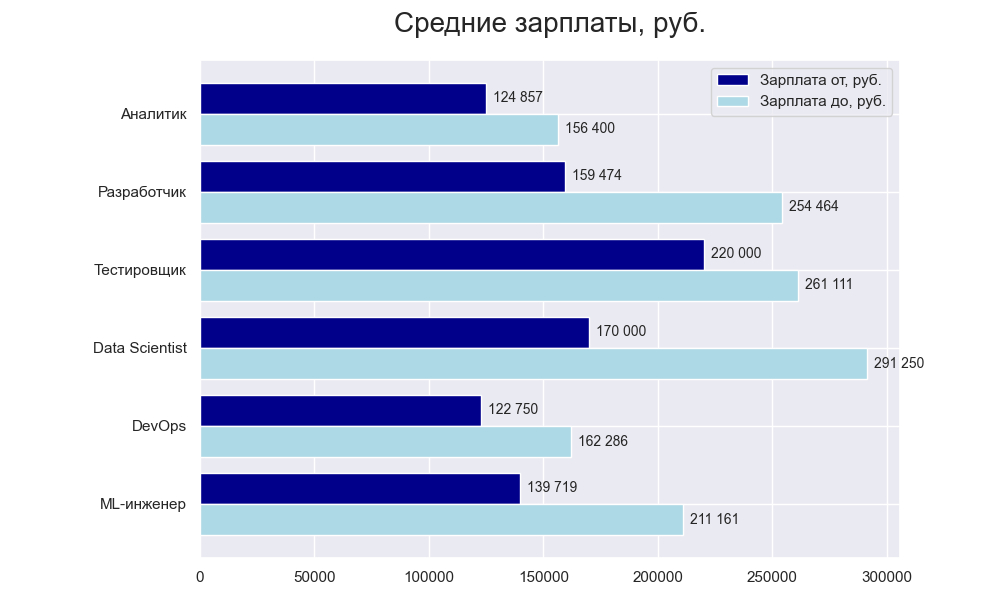

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_4316\1526829085.py:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


In [137]:
plot_job_salaries()

In [116]:
index = salaries_in_cities.index
values = salaries_in_cities['Зарплата от']
plot_title = 'Средние зарплаты (от… рублей) для некоторых городов'
x_label = 'Зарплата, от... руб.'
filename_сities = 'mean-salaries-cities'

salaries_in_cities.index.name='Регион'
salaries_in_cities.sort_values(by='Регион', inplace=True, ascending=True)

In [133]:
def plot_cities_salaries():
            
    fig, ax = plt.subplots(figsize=(10,6))
            
    bar = ax.barh(index, values, color=first_bar_color)
    plt.tight_layout()
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x: .0f}'))
                
    title = plt.title(plot_title, pad=20, fontsize=title_size)
    title.set_position([.5, 1])
    plt.subplots_adjust(top=0.9, bottom=0.1)
                
    rects = ax.patches
    # Place a label for each bar
    for rect in rects:
        # Get X and Y placement of label from rect
        x_value = rect.get_width()
        y_value = rect.get_y() + rect.get_height() / 2

        # Number of points between bar and label; change to your liking
        space = -40
        # Vertical alignment for positive values
        ha = 'left'

        # If value of bar is negative: place label to the left of the bar
        if x_value < 0:
            # Invert space to place label to the left
            space *= -1
            # Horizontally align label to the right
            ha = 'right'

        # Use X value as label and format number
        label = '{:,.0f}'.format(x_value).replace(',', ' ')

        # Create annotation
        plt.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at bar end
            xytext=(space, 0),          # Horizontally shift label by `space`
            textcoords='offset points', # Interpret `xytext` as offset in points
            va='center',                # Vertically center label
            ha=ha,                      # Horizontally align label differently for positive and negative values
            color = 'white')            # Change label color to white
        
    ax.set_xlabel(x_label, color='#525252')
    
    plt.savefig(filename_сities + '.png')    

<IPython.core.display.Javascript object>


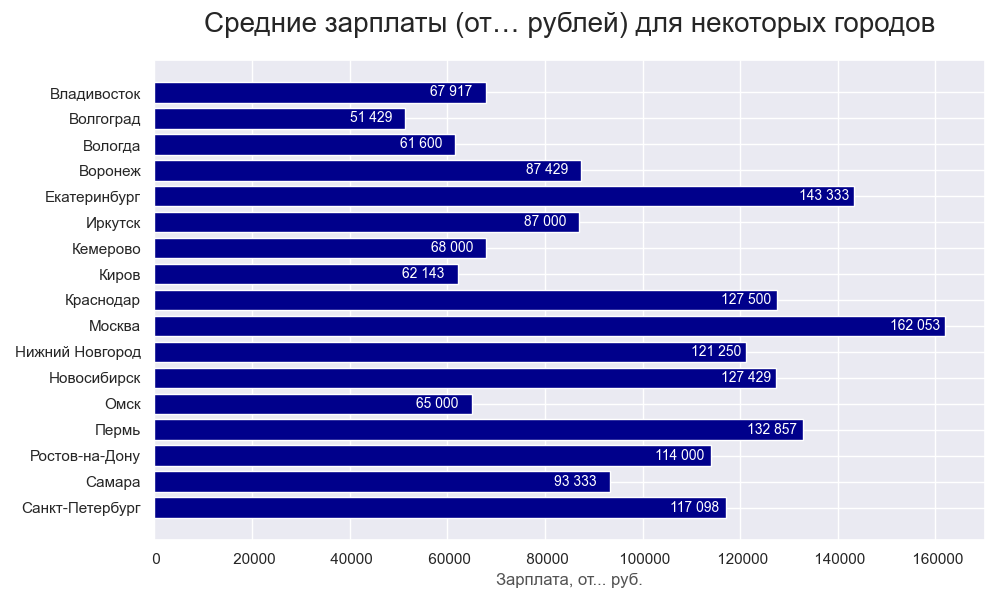

In [134]:
plot_cities_salaries()